In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('diabetes.csv')

# Data preprocessing

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There is no missing value in the data. Now let's take a look at the statistics of data.

In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Here you can see that some of the variables (Glucose, Blood pressure, Skin thickness, Insulin and BMI) has value 0 in them but they cant be zero. Will try to replace 0 with appropriate statistics as per their distribution.

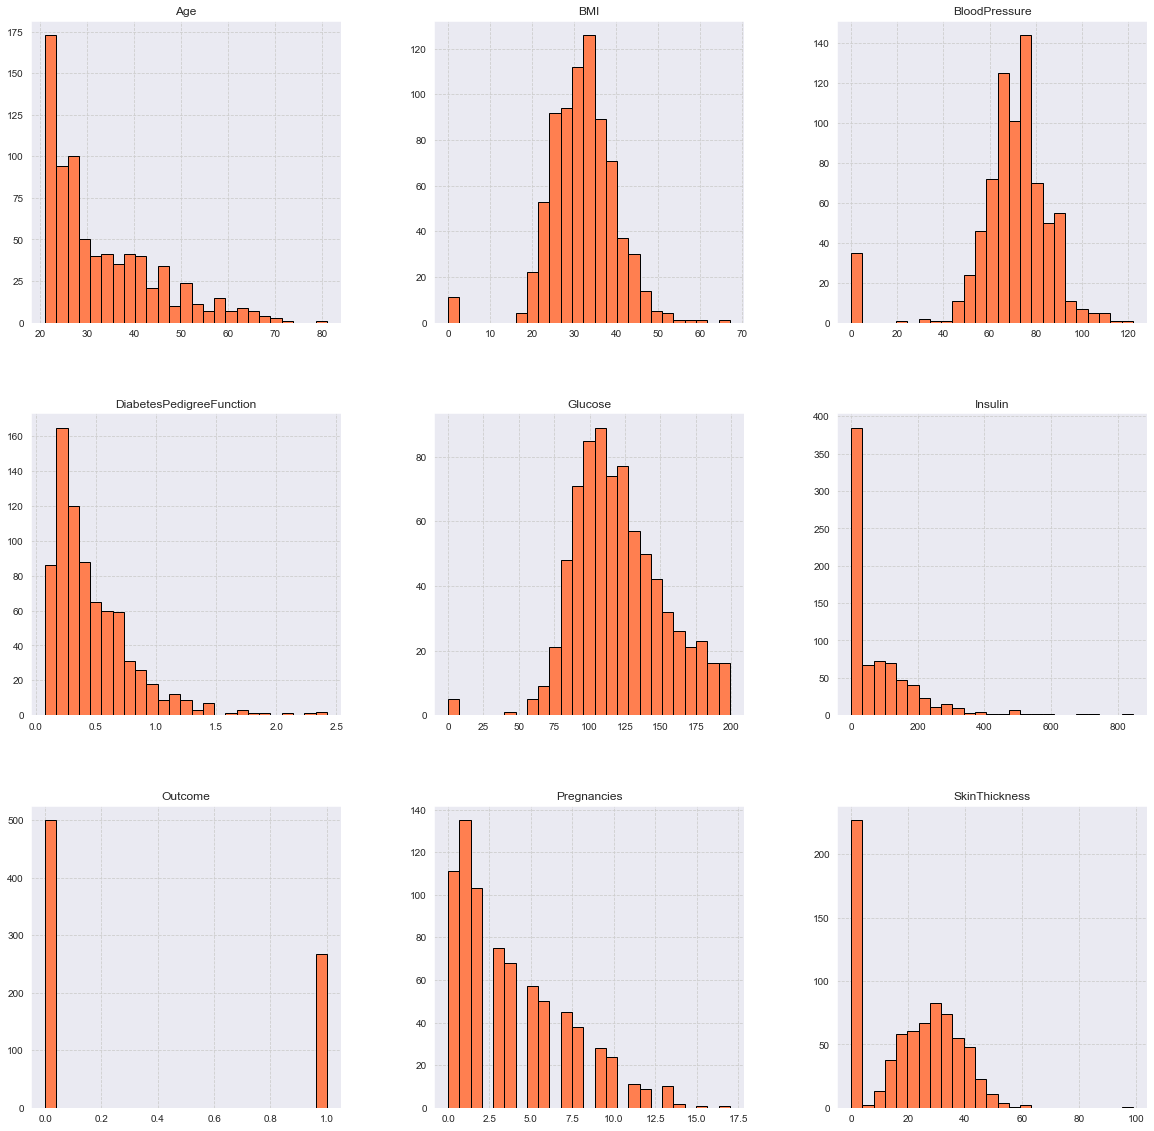

In [8]:
sns.set_style(style='darkgrid', rc={"grid.color": ".8", "grid.linestyle": "--"})
df.hist(figsize = (20,20),bins=25,color='#ff7f50',edgecolor="black")
plt.show()

As we can see from the plots that in Glucose, Blood pressure, Skin thickness, Insulin and BMI the bar at 0 is different from data. So we will replace those zeros with mean or median depending on there distribution.

* Glucose is normally distributed therefore 0 will be replaced by mean of glucose.
* Blood pressure is normally distributed therefore 0 will be replaced by mean of blood pressure.
* Skin thickness is normally distributed therefore 0 will be replaced by mean of skin thickness.
* Insulin is skewed hence 0 will be replaced by median of insulin.
* BMI is normally distributed therefore 0 will be replaced by mean of BMI.

In [9]:
df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].mean(),inplace=True)
df['BMI'].replace(0,df['BMI'].mean(),inplace=True)
df['Insulin'].replace(0,df['Insulin'].median(),inplace=True)

In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.000000,3.0000,6.00000,17.00
Glucose,768.0,121.681605,30.436016,44.000,99.750000,117.0000,140.25000,199.00
BloodPressure,768.0,72.254807,12.115932,24.000,64.000000,72.0000,80.00000,122.00
SkinThickness,768.0,26.606479,9.631241,7.000,20.536458,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.500000,31.2500,127.25000,846.00
BMI,768.0,32.450805,6.875374,18.200,27.500000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.243750,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.000000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.000000,0.0000,1.00000,1.00


Since DiabetesPedigreeFunction has very low variance hence dropping this feature

In [11]:
df.drop(['DiabetesPedigreeFunction'],axis=1,inplace=True)

Now lets find if there are outliers in the data.

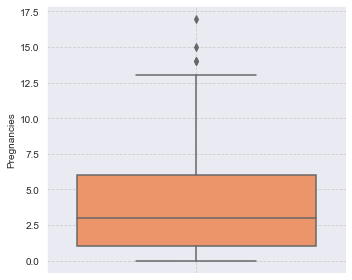

In [12]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['Pregnancies'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

In pregnency there are some outliers and they shall be removed

In [13]:
df[df['Pregnancies']>13]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
88,15,136.0,70.0,32.0,110.0,37.1,43,1
159,17,163.0,72.0,41.0,114.0,40.9,47,1
298,14,100.0,78.0,25.0,184.0,36.6,46,1
455,14,175.0,62.0,30.0,30.5,33.6,38,1


In [14]:
df.drop(df[df['Pregnancies']>13].index, inplace=True)

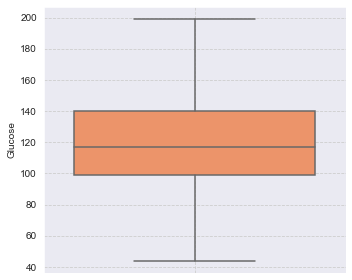

In [15]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['Glucose'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

No outlier in Glucose

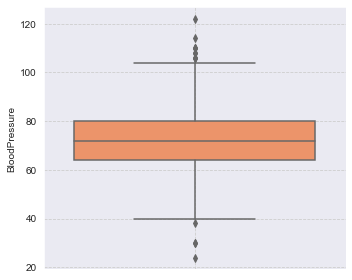

In [16]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['BloodPressure'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

In [17]:
mean=df['BloodPressure'].mean()
std=df['BloodPressure'].std()
df[(df['BloodPressure']<(mean-3*std))]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
18,1,103.0,30.0,38.0,83.0,43.3,33,0
125,1,88.0,30.0,42.0,99.0,55.0,26,1
597,1,89.0,24.0,19.0,25.0,27.8,21,0


will impute these points with 40 as blood pressure less than 40 very deadly. And blood pressure in range of 100 to 120 is considered to be case of high blood perssure

In [18]:
df['BloodPressure'].replace(30.0,40,inplace=True)
df['BloodPressure'].replace(24.0,40,inplace=True)

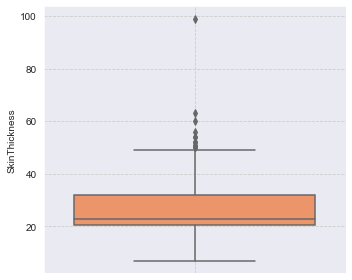

In [19]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['SkinThickness'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

tricep skin thickness range is from 10 to 50. Therefore removing those entries

In [20]:
df[df['SkinThickness']>55]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
57,0,100.0,88.0,60.0,110.0,46.8,31,0
120,0,162.0,76.0,56.0,100.0,53.2,25,1
445,0,180.0,78.0,63.0,14.0,59.4,25,1
579,2,197.0,70.0,99.0,30.5,34.7,62,1


In [21]:
df.drop(df[df['SkinThickness']>55].index, inplace=True)

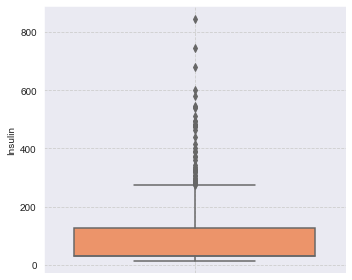

In [22]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['Insulin'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

Will remove entries for more than 600 insulin

In [23]:
df[df['Insulin']>600]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
13,1,189.0,60.0,23.0,846.0,30.1,59,1
228,4,197.0,70.0,39.0,744.0,36.7,31,0
247,0,165.0,90.0,33.0,680.0,52.3,23,0


In [24]:
df.drop(df[df['Insulin']>600].index, inplace=True)

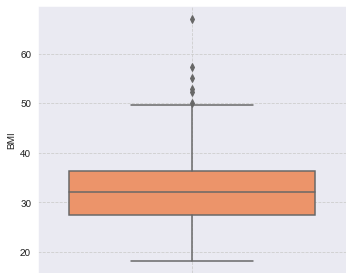

In [25]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['BMI'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

In [26]:
df[df['BMI']>60]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age,Outcome
177,0,129.0,110.0,46.0,130.0,67.1,26,1


In [27]:
df.drop(df[df['BMI']>60].index, inplace=True)

# EDA

Now we will perform exploratory data analysis and try to find some answer to question

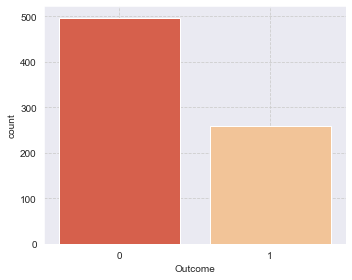

In [28]:
plt.figure(figsize=(5,4))
sns.countplot(df['Outcome'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

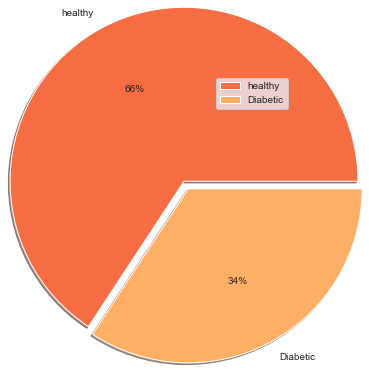

In [29]:
out_df=pd.DataFrame(df.groupby('Outcome')['Outcome'].count())
colors = ['#F66D44','#FEAE65']
plt.pie(out_df['Outcome'],labels=['healthy','Diabetic'],autopct='%.0f%%',colors=colors,radius=2,explode = (0, 0.1),shadow=True)
plt.legend()
plt.show()

The dataset is imbalanced. 66% is of healthy and 34% is of diabetic

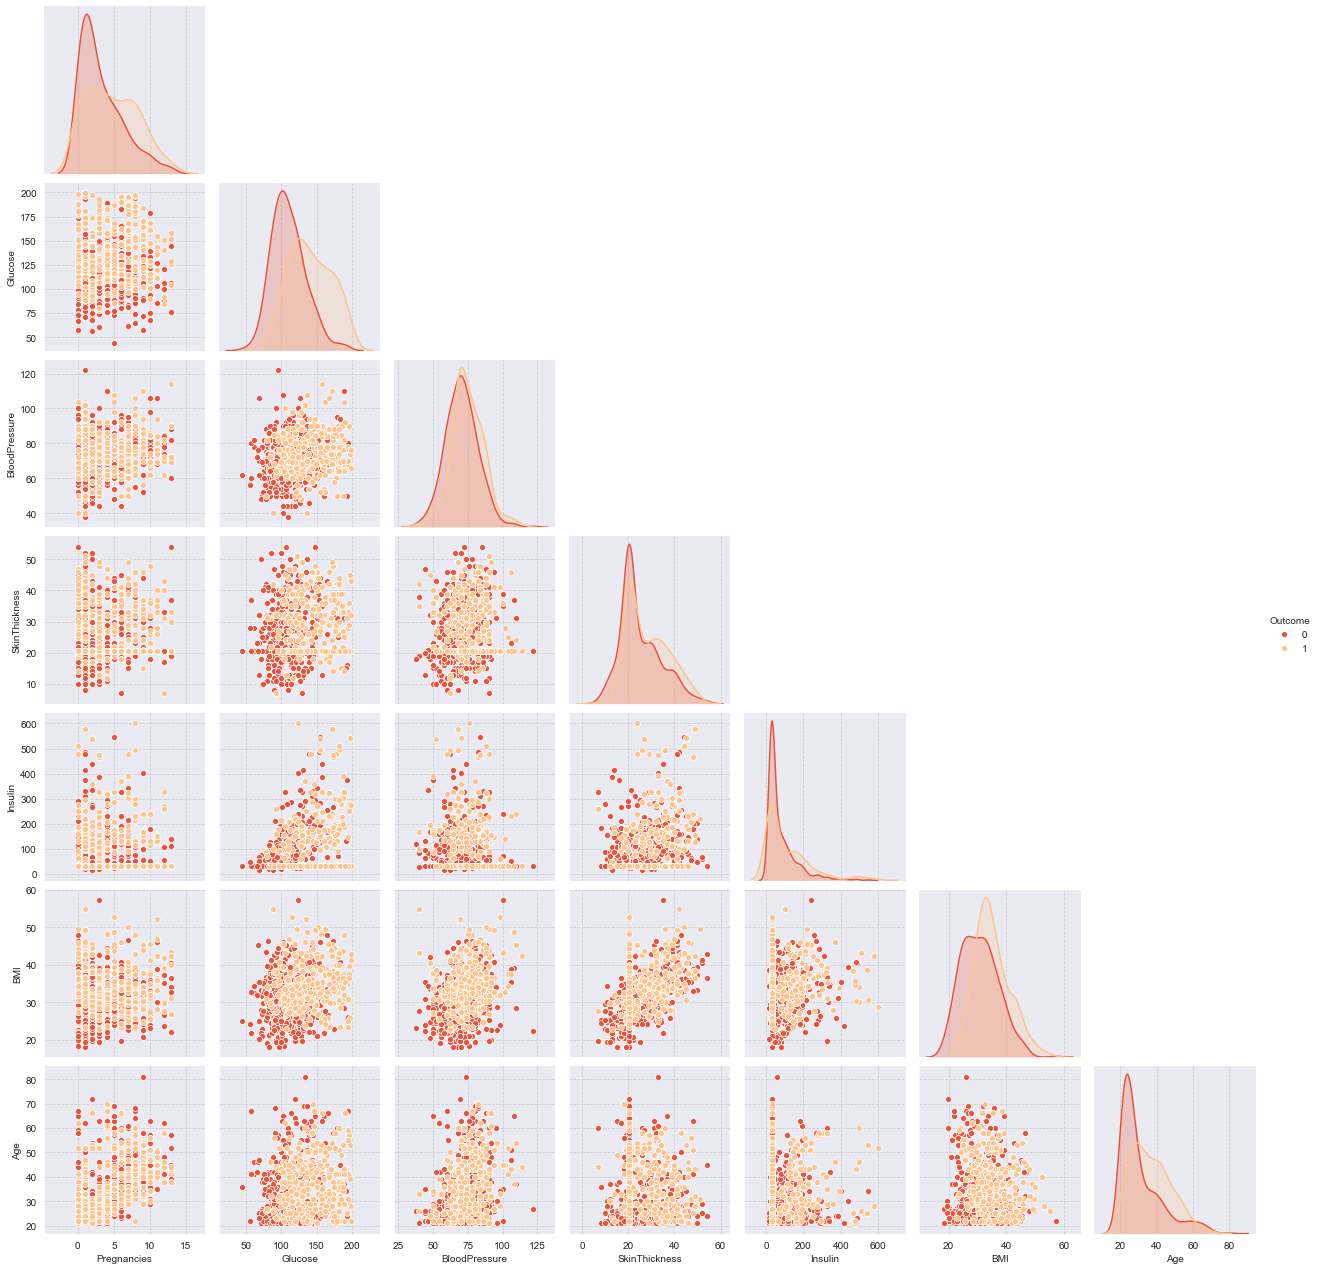

In [30]:
sns.pairplot(df,palette='OrRd_r',hue='Outcome',corner=True)
plt.show()

From above pairplot we can see that:
1. A person with high Glucose can be diabetic.
2. A person with thick tricep skin can be diabetic.
3. A person with high BMI can be diabetic.

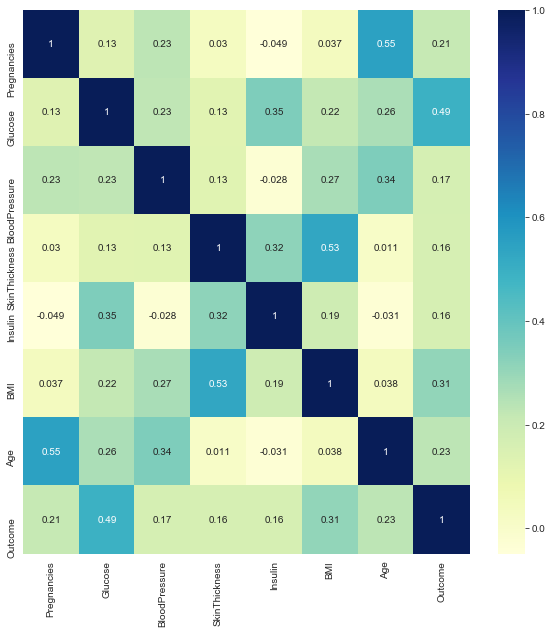

In [31]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

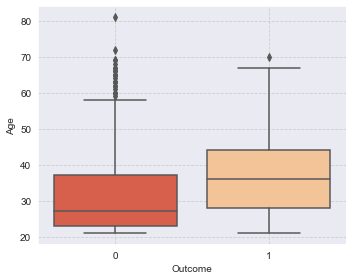

In [32]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['Age'],x=df['Outcome'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

From the graph we can say that person with more age is more likely to be diabetic

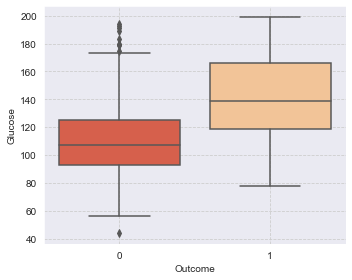

In [33]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['Glucose'],x=df['Outcome'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

As observed earlier that high Glucose leads to diabetes

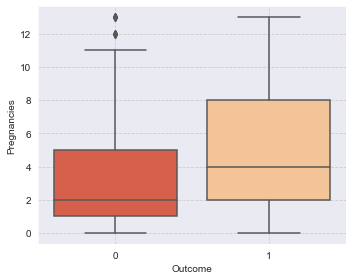

In [34]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['Pregnancies'],x=df['Outcome'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

Women with high pregnancy are diabetes patient

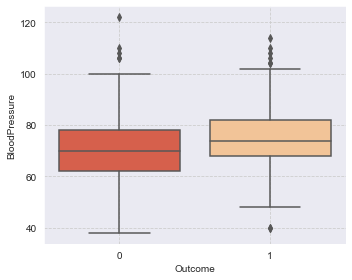

In [35]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['BloodPressure'],x=df['Outcome'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

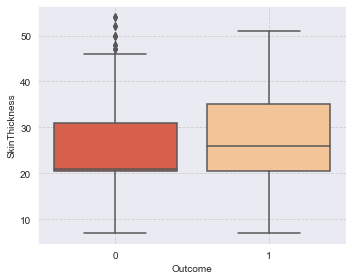

In [36]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['SkinThickness'],x=df['Outcome'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

A person with thick tricep skin can be diabetic.

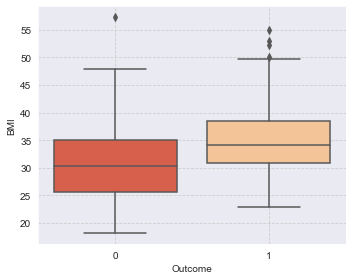

In [37]:
plt.figure(figsize=(5,4))
sns.boxplot(y=df['BMI'],x=df['Outcome'],palette='OrRd_r',saturation=0.8)
plt.tight_layout()
plt.grid(True)
plt.show()

As observed earlier that high BMI leads to diabetes

# Data Preparation

In [38]:
X=df.drop(['Outcome'],axis=1)
y=df.Outcome

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [41]:
from sklearn.preprocessing import StandardScaler
StdSc=StandardScaler()

In [42]:
for col in X.columns:
    StdSc.fit(X_train[[col]])
    X_train[col]=StdSc.transform(X_train[[col]])
    X_test[col]=StdSc.transform(X_test[[col]])

In [43]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Age
501,-0.210321,-1.241316,-0.031043,0.635512,-0.637080,0.751478,-0.430961
339,1.029032,1.905473,0.982188,-0.635688,-0.637080,1.151116,0.656762
589,-1.139835,-1.609557,-0.275445,-0.635688,-0.637080,-1.631543,-0.681975
271,-0.520159,-0.437881,-0.875402,0.635512,-0.367745,-1.024687,-1.016659
418,-0.829997,-1.274793,-0.368786,-0.635688,-0.637080,-2.060783,-0.514632


In [44]:
X_test.aggregate(['mean','var']).transpose()

,mean,var
Pregnancies,0.213668,1.124893
Glucose,0.004802,1.059597
BloodPressure,-0.059022,1.071613
SkinThickness,0.019986,1.024294
Insulin,0.065479,1.305543
BMI,0.105941,0.798223
Age,0.006110,0.812951


# Model Fitting

We will use Naïve Bayes, KNN, Logistic Regression, SVC, Decision tree, Random Forest, Xg-boost

In [45]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [46]:
model_param={
    'svm':{
        'model':SVC(),
        'params':{ 'C':[1,10,20,50],
                  'kernel':['linear', 'rbf']
                 }
    },
    'Randomforest':{
        'model':RandomForestClassifier(),
        'params':{'n_estimators':[10,30,50,100],
                  'criterion':['gini','entropy']}
    },
    'Logistic':{
        'model':LogisticRegression(),
        'params':{ 'C': [1,5,10]}
    },
    'naive_bayes_gaussian': {
        'model': GaussianNB(),
        'params': {}
   
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    },
    'XGBClass':{
        'model':XGBClassifier(eval_metric='logloss'),
        'params':{
            'eta':[0.01,0.05,0.1,0.2,0.25,0.3],
            'n_estimators':[10,100,1000],
            'lambda':[0,1],
            'alpha':[0,1]
        }
    },
    'KNN':{
        'model':KNeighborsClassifier(),
        'params':{
            'n_neighbors' : [5,7,9,11,13,15],
            'weights' : ['uniform','distance'],
            'metric' : ['minkowski','euclidean','manhattan']
        }
    }
}

In [47]:
scores = []
from sklearn.model_selection import GridSearchCV
for model_name, mp in model_param.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=15, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
dataframe = pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [48]:
dataframe

,model,best_score,best_params
0,svm,0.774878,"{'C': 10, 'kernel': 'linear'}"
1,Randomforest,0.776260,"{'criterion': 'gini', 'n_estimators': 30}"
2,Logistic,0.778171,{'C': 1}
3,naive_bayes_gaussian,0.758374,{}
4,decision_tree,0.709878,{'criterion': 'gini'}
5,XGBClass,0.773130,"{'alpha': 1, 'eta': 0.05, 'lambda': 0, 'n_esti..."
6,KNN,0.769878,"{'metric': 'manhattan', 'n_neighbors': 15, 'we..."


# Conclusion

In [57]:
dataframe.sort_values('best_score',ascending=False,inplace=True)
dataframe[['model','best_score']]

,model,best_score
2,Logistic,0.778171
1,Randomforest,0.776260
0,svm,0.774878
5,XGBClass,0.773130
6,KNN,0.769878
3,naive_bayes_gaussian,0.758374
4,decision_tree,0.709878


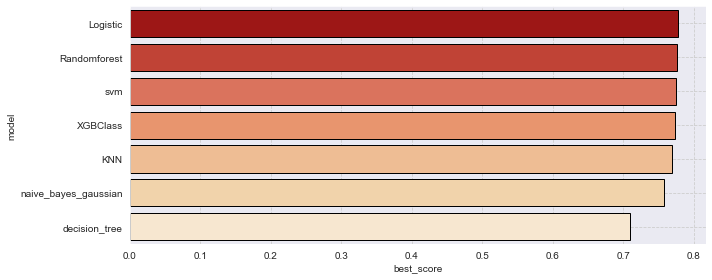

In [55]:
plt.figure(figsize=(10,4))
sns.barplot(y=dataframe['model'],x=dataframe['best_score'],palette='OrRd_r',edgecolor="black")
plt.tight_layout()
plt.grid(True)
plt.show()

Logistics regression is giving the best result and descision tree is least accurate on test set.